<a href="https://colab.research.google.com/github/Bansalnitika21/Geeksman_AISquad_Project1_NITIKA/blob/devil/model_trainingandsaving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MAIN PROGRAM OF TRAINING AND SAVING MODEL**


###**DATASET**

FIRSTLY UPLOAD .JSON FILE THAT YOU DOWNLOADED FROM CREATING API TOKEN

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Saving kaggle.json to kaggle (1).json


IMPORTING OS, PANDAS AND SETTING THE ENVIRONMENT VARIABLE

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

###**.ZIP FILE**


THIS WILL DOWNLOAD A .ZIP FILE AT CONTENT LOCATION

In [ ]:
!kaggle datasets download -d bansalnitika21/dataset

 96% 420M/437M [00:05<00:00, 95.7MB/s]
100% 437M/437M [00:06<00:00, 74.6MB/s]


THIS WILL UNZIP THE .ZIP FILE, DOWNLOADED USING API COMMAND

In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: waste-classification-data/d

###**IMPORTING LIBRARIES**


RELOAD

MATPLOTLIB

FASTAI

WARNINGS

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**BATCHSIZE**

you can replace 64 with 16 in case an error occurs

In [ ]:
bs=64

### **DATA**


DEFINING DATA AND ASSIGNING A PATH

You can change dataset to DATASET too

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/waste-classification-data/dataset"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

**DISPLAYING DATA**

You can change rows and figuresize for curiosity

/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


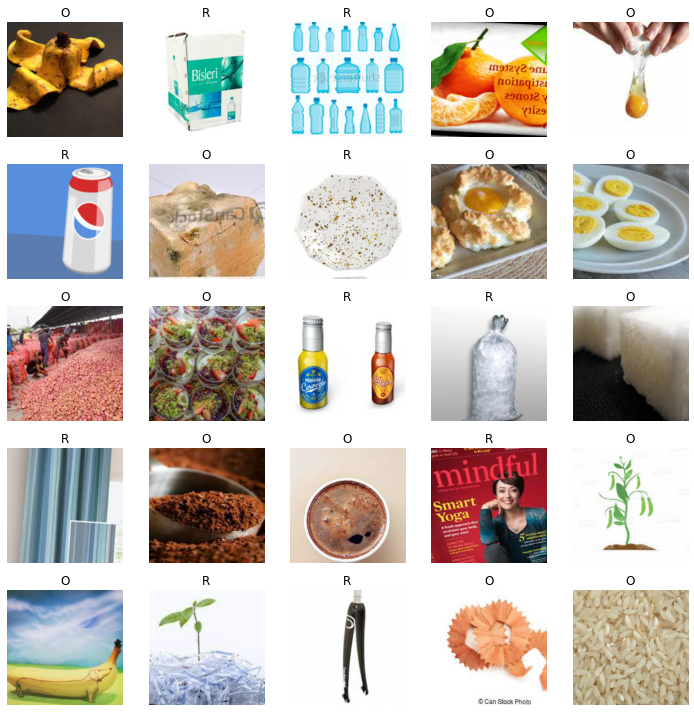

In [ ]:
data.show_batch(rows=5, figsize=(10,10))

**Printing the name of the folders inside dataset or DATASET written in above to above cell**

Length means counting how many folders are present inside a directory!!

In [ ]:
print(data.classes)
len(data.classes)

['O', 'R']


2

###**DRIVE**

**MOUNTING DRIVE**

 For storing the trained model!

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**FOR MAKING DIRECTORIES OR FOLDERS IN DRIVE**

In [5]:
os.makedirs("/content/drive/My Drive/Geeksman_AISquad_Project1_NITIKA/waste_classification",exist_ok=True)

NameError: ignored

**Defining my_dir so that we can use this long loaction in a short form in later cells**

In [ ]:
my_dir="/content/drive/My Drive/Geeksman_AISquad_Project1_NITIKA/waste_classification"

### **LOCATING IN DRIVE**

WE CAN ALSO USE SHUTIL LIBRARY TO LOCATE IN DRIVE BUT SOME PEOPLE ARE NEW TO PYTHON AND USE OF CD COMMAND IS EASILY AVAILABLE ON YOUTUBE!!

**The location is in drive**

In [ ]:
cd drive

/content/drive


**The loaction is drive/My Drive**

In [ ]:
cd My Drive

/content/drive/My Drive


**The loaction is drive/My Drive/Geeksman_AISquad_Project1_NITIKA**

In [ ]:
cd Geeksman_AISquad_Project1_NITIKA

/content/drive/My Drive/Geeksman_AISquad_Project1_NITIKA


**The loaction is drive/My Drive/Geeksman_AISquad_Project1_NITIKA/waste_classification**

In [ ]:
cd waste_classification

/content/drive/My Drive/Geeksman_AISquad_Project1_NITIKA/waste_classification


### **MODEL**


**DEFINNING LEARN**

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


**YOU CHANGE THE NUMBER OF CYCLES**

I CHOSE 4 BECAUSE MY GURUJI TAUGHT ME 4YEARS IN BTECH SO WE SHOULD REPRESENT THOSE 4YEARS IN OUR WORK TOO!!

smile after reading this lol!!

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.238060,0.143140,0.947358,03:46
1,0.161109,0.116356,0.958126,03:42
2,0.117421,0.099097,0.962313,03:43
3,0.095109,0.091699,0.963510,03:42


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

Ahaan!! Here comes the use of **my_dir** 

**This cell is for saving the trained model in waste_classification folder!!**

This cell will download a .pth file in waste_classification folder

You can change name of the .pth file by replacing Stage-1 to something else!!

In [ ]:
learn.save(my_dir+"/Stage-1")

**LOADING THE SAVED MODEL**

In [ ]:
learn.load("/content/drive/My Drive/Geeksman_AISquad_Project1_NITIKA/waste_classification/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (20062 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
R,R,R,R,R
Path: /content/waste-classification-data/dataset;

Valid: LabelList (5015 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
O,R,O,O,O
Path: /content/waste-classification-data/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

**FOR EXPORTING THE SAVED MODEL**

This cell will generate an export.pkl file in waste_classification folder so that you can write a code and use that .pkl file directly in a new notebook!!

In [ ]:
learn.export(my_dir+"/export.pkl")

###**KORA**

INSTALLING KORA

kora drive and google drive are different things..

In [1]:
!pip install -U kora

IMPORTING UPLOAD_PUBLIC FOR GENERATING A PUBLIC AND SHAREABLE LINK

In [2]:
from kora.drive import upload_public

DEFINNING THE LINK AS URL GENERATED BY ACCESSING EXPORT.PKL FILE.

In [8]:
url2 = upload_public('/content/drive/My Drive/Geeksman_AISquad_Project1_NITIKA/waste_classification/export.pkl')

WE GENERATED THIS LINK SO THAT IN NEXT NOTEBOOK THERE WILL BE NO NEED OF MOUNTING DRIVE!

In [9]:
url2

'https://drive.google.com/uc?id=10DVVG3rJkfsmC2lFu8PfyD9rlmXHLd8g'